In [ ]:
import json
import random
from tqdm import tqdm
import numpy as np

from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

import torch

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

# –ß—Ç–æ –¥–µ–ª–∞—Ç—å?
–ì–¥–µ –µ—Å—Ç—å –ø–æ–º–µ—Ç–∫–∞ # CODE –ø–∏—Å–∞—Ç—å –∫–æ–¥

[–ü–æ–ª–µ–∑–Ω—ã–π —Ç—É—Ç–æ—Ä–∏–∞–ª](http://jalammar.github.io/illustrated-word2vec/)

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
–û–Ω–∏ —É–∂–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ. –ü—Ä–æ—Ü–µ—Å—Å –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ —Ç–µ—Ç—Ä–∞–¥–∫–µ 1.1 Processing corpus

In [ ]:
with open('processed_corpus.json') as f:
    corpus = json.load(f)

In [ ]:
len(corpus)

100000

In [ ]:
for text in corpus[:5]:
    print(' '.join(text))

–≤—Ç–æ—Ä–æ–π UNK –≥–æ–¥ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞—Ç—å —Ä–µ—à–∏—Ç—å –ø–æ–¥–∞—Ç—å—Å—è –∞–ª—å—Ñ–∞–±–∞–Ω–∫
–≤–µ—Ä–Ω—É—Ç—å –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å—Ç–≤–æ –ª–∏—Ü–µ–≤–æ–π —Å—á—ë—Ç –ª–∏–±–æ –∑–∞—á–µ—Å—Ç—å —Å—á—ë—Ç –ø–æ–≥–∞—à–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç
–ø—Ä–∏—Ç–æ–º —Å–∏—Ç—É–∞—Ü–∏—è —Ä–µ—à–∏—Ç—å—Å—è —É—á–∞—Å—Ç–∏–µ —Ç–µ—á–µ–Ω–∏–µ —Å—É—Ç–∫–∏ –∑–∞—è–≤–∏—Ç—å
–º–æ–π ##—á–∏—Å–ª–æ –ª–µ—Ç–Ω–∏–π –∂–∏–∑–Ω—å —ç—Ç–æ —Å–∞–º—ã–π –Ω–µ–ø–æ–≤–æ—Ä–æ—Ç–ª–∏–≤—ã–π —Ä–∞–±–æ—Ç–Ω–∏–∫ –±–∞–Ω–∫ –∫–æ—Ç–æ—Ä—ã–π –≤–∏–¥–µ—Ç—å
–≤–µ–∑–¥–µ –Ω–∞–ø–∏—Å–∞—Ç—å –≤–∫–ª–∞–¥ –ø—Ä–∏–Ω–∏–º–∞—Ç—å –æ—á–µ—Ä–µ–¥—å —ç—Ç–æ


# CBOW

In [ ]:
sample_text = corpus[1]

In [ ]:
' '.join(sample_text)

'–≤–µ—Ä–Ω—É—Ç—å –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å—Ç–≤–æ –ª–∏—Ü–µ–≤–æ–π —Å—á—ë—Ç –ª–∏–±–æ –∑–∞—á–µ—Å—Ç—å —Å—á—ë—Ç –ø–æ–≥–∞—à–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç'

In [ ]:
list(enumerate(sample_text))

[(0, '–≤–µ—Ä–Ω—É—Ç—å'),
 (1, '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 (2, '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 (3, '–ª–∏—Ü–µ–≤–æ–π'),
 (4, '—Å—á—ë—Ç'),
 (5, '–ª–∏–±–æ'),
 (6, '–∑–∞—á–µ—Å—Ç—å'),
 (7, '—Å—á—ë—Ç'),
 (8, '–ø–æ–≥–∞—à–µ–Ω–∏–µ'),
 (9, '–∫—Ä–µ–¥–∏—Ç')]

# –†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –Ω–∞ –ø—Ä–∏–º–µ—Ä—ã –º–µ—Ç–æ–¥–æ–º CBOW

In [ ]:
def cbow_split(tokens, window, pad_token='PAD'):

    splits = []

    for el in enumerate(tokens):
      right = [] # –ø—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç
      left = [] # –ª–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç
      for i in range(window):
        if (el[0] - i) > 0:
          left_token = tokens[el[0] - i - 1]
        else:
          left_token = pad_token
        if (el[0] + i + 1) >= len(tokens):
          right_token = pad_token
        else:
          right_token = tokens[el[0] + i + 1]
        left.append(left_token)
        right.append(right_token)
      splits.append((left[::-1], el[1], right))
    return splits

In [ ]:
splits = cbow_split(sample_text, window=2)

In [ ]:
for sample in splits:
    print('–õ–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç:', sample[0])
    print('–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ:', sample[1])
    print('–ü—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç:', sample[2], end='\n\n')

–õ–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['PAD', 'PAD']
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –≤–µ—Ä–Ω—É—Ç—å
–ü—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ']

–õ–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['PAD', '–≤–µ—Ä–Ω—É—Ç—å']
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –¥–µ–Ω–µ–∂–Ω—ã–π
–ü—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π']

–õ–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω–µ–∂–Ω—ã–π']
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: —Å—Ä–µ–¥—Å—Ç–≤–æ
–ü—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç']

–õ–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ']
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –ª–∏—Ü–µ–≤–æ–π
–ü—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['—Å—á—ë—Ç', '–ª–∏–±–æ']

–õ–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π']
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: —Å—á—ë—Ç
–ü—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å']

–õ–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç: ['–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç']
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –ª–∏–±–æ
–ü—Ä–∞–≤—ã–π –∫–

In [ ]:
splits

[(['PAD', 'PAD'], '–≤–µ—Ä–Ω—É—Ç—å', ['–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ']),
 (['PAD', '–≤–µ—Ä–Ω—É—Ç—å'], '–¥–µ–Ω–µ–∂–Ω—ã–π', ['—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π']),
 (['–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω–µ–∂–Ω—ã–π'], '—Å—Ä–µ–¥—Å—Ç–≤–æ', ['–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç']),
 (['–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ'], '–ª–∏—Ü–µ–≤–æ–π', ['—Å—á—ë—Ç', '–ª–∏–±–æ']),
 (['—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π'], '—Å—á—ë—Ç', ['–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å']),
 (['–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç'], '–ª–∏–±–æ', ['–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç']),
 (['—Å—á—ë—Ç', '–ª–∏–±–æ'], '–∑–∞—á–µ—Å—Ç—å', ['—Å—á—ë—Ç', '–ø–æ–≥–∞—à–µ–Ω–∏–µ']),
 (['–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å'], '—Å—á—ë—Ç', ['–ø–æ–≥–∞—à–µ–Ω–∏–µ', '–∫—Ä–µ–¥–∏—Ç']),
 (['–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç'], '–ø–æ–≥–∞—à–µ–Ω–∏–µ', ['–∫—Ä–µ–¥–∏—Ç', 'PAD']),
 (['—Å—á—ë—Ç', '–ø–æ–≥–∞—à–µ–Ω–∏–µ'], '–∫—Ä–µ–¥–∏—Ç', ['PAD', 'PAD'])]

# Expected

```python
[(['PAD', 'PAD'], '–≤–æ–ø—Ä–æ—Å', ['–ø–æ—á–µ–º—É', '–Ω–∞–ø—Ä–∏–º–µ—Ä']),
 (['PAD', '–≤–æ–ø—Ä–æ—Å'], '–ø–æ—á–µ–º—É', ['–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π']),
 (['–≤–æ–ø—Ä–æ—Å', '–ø–æ—á–µ–º—É'], '–Ω–∞–ø—Ä–∏–º–µ—Ä', ['–∫–∏—Ç–∞–π—Å–∫–∏–π', '—è–ø–æ–Ω—Å–∫–∏–π']),
 (['–ø–æ—á–µ–º—É', '–Ω–∞–ø—Ä–∏–º–µ—Ä'], '–∫–∏—Ç–∞–π—Å–∫–∏–π', ['—è–ø–æ–Ω—Å–∫–∏–π', 'UNK']),
 (['–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π'], '—è–ø–æ–Ω—Å–∫–∏–π', ['UNK', 'PAD']),
 (['–∫–∏—Ç–∞–π—Å–∫–∏–π', '—è–ø–æ–Ω—Å–∫–∏–π'], 'UNK', ['PAD', 'PAD'])]
```

In [ ]:
cbow_split(sample_text, window=3)

[(['PAD', 'PAD', 'PAD'], '–≤–µ—Ä–Ω—É—Ç—å', ['–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π']),
 (['PAD', 'PAD', '–≤–µ—Ä–Ω—É—Ç—å'], '–¥–µ–Ω–µ–∂–Ω—ã–π', ['—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç']),
 (['PAD', '–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω–µ–∂–Ω—ã–π'], '—Å—Ä–µ–¥—Å—Ç–≤–æ', ['–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç', '–ª–∏–±–æ']),
 (['–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ'], '–ª–∏—Ü–µ–≤–æ–π', ['—Å—á—ë—Ç', '–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å']),
 (['–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π'], '—Å—á—ë—Ç', ['–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç']),
 (['—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç'], '–ª–∏–±–æ', ['–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç', '–ø–æ–≥–∞—à–µ–Ω–∏–µ']),
 (['–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç', '–ª–∏–±–æ'], '–∑–∞—á–µ—Å—Ç—å', ['—Å—á—ë—Ç', '–ø–æ–≥–∞—à–µ–Ω–∏–µ', '–∫—Ä–µ–¥–∏—Ç']),
 (['—Å—á—ë—Ç', '–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å'], '—Å—á—ë—Ç', ['–ø–æ–≥–∞—à–µ–Ω–∏–µ', '–∫—Ä–µ–¥–∏—Ç', 'PAD']),
 (['–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç'], '–ø–æ–≥–∞—à–µ–Ω–∏–µ', ['–∫—Ä–µ–¥–∏—Ç', 

# Expected

```python
[(['PAD', 'PAD', 'PAD'], '–≤–æ–ø—Ä–æ—Å', ['–ø–æ—á–µ–º—É', '–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π']),
 (['PAD', 'PAD', '–≤–æ–ø—Ä–æ—Å'], '–ø–æ—á–µ–º—É', ['–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π', '—è–ø–æ–Ω—Å–∫–∏–π']),
 (['PAD', '–≤–æ–ø—Ä–æ—Å', '–ø–æ—á–µ–º—É'], '–Ω–∞–ø—Ä–∏–º–µ—Ä', ['–∫–∏—Ç–∞–π—Å–∫–∏–π', '—è–ø–æ–Ω—Å–∫–∏–π', 'UNK']),
 (['–≤–æ–ø—Ä–æ—Å', '–ø–æ—á–µ–º—É', '–Ω–∞–ø—Ä–∏–º–µ—Ä'], '–∫–∏—Ç–∞–π—Å–∫–∏–π', ['—è–ø–æ–Ω—Å–∫–∏–π', 'UNK', 'PAD']),
 (['–ø–æ—á–µ–º—É', '–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π'], '—è–ø–æ–Ω—Å–∫–∏–π', ['UNK', 'PAD', 'PAD']),
 (['–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π', '—è–ø–æ–Ω—Å–∫–∏–π'], 'UNK', ['PAD', 'PAD', 'PAD'])]
```

# Skipgram

In [ ]:
' '.join(sample_text)

'–≤–µ—Ä–Ω—É—Ç—å –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å—Ç–≤–æ –ª–∏—Ü–µ–≤–æ–π —Å—á—ë—Ç –ª–∏–±–æ –∑–∞—á–µ—Å—Ç—å —Å—á—ë—Ç –ø–æ–≥–∞—à–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç'

# –†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –Ω–∞ –ø—Ä–∏–º–µ—Ä—ã –º–µ—Ç–æ–¥–æ–º Skipgram

In [ ]:
def skipgram_split(tokens, window):
    splits = []
    for el in enumerate(tokens):
      right = [] # –ø—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç
      left = [] # –ª–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç
      for i in range(window):
        if (el[0] - i) > 0:
          left_token = tokens[el[0] - i - 1]
          splits.append((left_token, el[1]))
        if (el[0] + i + 1) < len(tokens):
          right_token = tokens[el[0] + i + 1]
          splits.append((right_token, el[1]))
    return splits

In [ ]:
splits = skipgram_split(sample_text, window=2)

In [ ]:
for sample in splits:
    print('–ö–æ–Ω—Ç–µ–∫—Å—Ç:', sample[0])
    print('–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ:', sample[1], end='\n\n')

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –¥–µ–Ω–µ–∂–Ω—ã–π
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –≤–µ—Ä–Ω—É—Ç—å

–ö–æ–Ω—Ç–µ–∫—Å—Ç: —Å—Ä–µ–¥—Å—Ç–≤–æ
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –≤–µ—Ä–Ω—É—Ç—å

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –≤–µ—Ä–Ω—É—Ç—å
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –¥–µ–Ω–µ–∂–Ω—ã–π

–ö–æ–Ω—Ç–µ–∫—Å—Ç: —Å—Ä–µ–¥—Å—Ç–≤–æ
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –¥–µ–Ω–µ–∂–Ω—ã–π

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –ª–∏—Ü–µ–≤–æ–π
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –¥–µ–Ω–µ–∂–Ω—ã–π

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –¥–µ–Ω–µ–∂–Ω—ã–π
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: —Å—Ä–µ–¥—Å—Ç–≤–æ

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –ª–∏—Ü–µ–≤–æ–π
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: —Å—Ä–µ–¥—Å—Ç–≤–æ

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –≤–µ—Ä–Ω—É—Ç—å
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: —Å—Ä–µ–¥—Å—Ç–≤–æ

–ö–æ–Ω—Ç–µ–∫—Å—Ç: —Å—á—ë—Ç
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: —Å—Ä–µ–¥—Å—Ç–≤–æ

–ö–æ–Ω—Ç–µ–∫—Å—Ç: —Å—Ä–µ–¥—Å—Ç–≤–æ
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –ª–∏—Ü–µ–≤–æ–π

–ö–æ–Ω—Ç–µ–∫—Å—Ç: —Å—á—ë—Ç
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ: –ª–∏—Ü–µ–≤–æ–π

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –¥–µ–Ω–µ–∂–Ω—ã–π
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ

In [ ]:
skipgram_split(sample_text, window=2)

[('–¥–µ–Ω–µ–∂–Ω—ã–π', '–≤–µ—Ä–Ω—É—Ç—å'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '–≤–µ—Ä–Ω—É—Ç—å'),
 ('–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 ('–ª–∏—Ü–µ–≤–æ–π', '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 ('–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('–ª–∏—Ü–µ–≤–æ–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('–≤–µ—Ä–Ω—É—Ç—å', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('—Å—á—ë—Ç', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π'),
 ('—Å—á—ë—Ç', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–¥–µ–Ω–µ–∂–Ω—ã–π', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–ª–∏–±–æ', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç'),
 ('–ª–∏–±–æ', '—Å—á—ë—Ç'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '—Å—á—ë—Ç'),
 ('–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç'),
 ('—Å—á—ë—Ç', '–ª–∏–±–æ'),
 ('–∑–∞—á–µ—Å—Ç—å', '–ª–∏–±–æ'),
 ('–ª–∏—Ü–µ–≤–æ–π', '–ª–∏–±–æ'),
 ('—Å—á—ë—Ç', '–ª–∏–±–æ'),
 ('–ª–∏–±–æ', '–∑–∞—á–µ—Å—Ç—å'),
 ('—Å—á—ë—Ç', '–∑–∞—á–µ—Å—Ç—å'),
 ('—Å—á—ë—Ç', '–∑–∞—á–µ—Å—Ç—å'),
 ('–ø–æ–≥–∞—à–µ–Ω–∏–µ', '–∑–∞—á–µ—Å—Ç—å'),
 ('–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç'),
 ('–ø–æ–≥–∞—à–µ–Ω–∏–µ', '—Å—á—ë—Ç'),
 ('–ª–∏–±–æ', '—Å—á—ë—Ç')

# Expected

```python
[('–ø–æ—á–µ–º—É', '–≤–æ–ø—Ä–æ—Å'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '–≤–æ–ø—Ä–æ—Å'),
 ('–≤–æ–ø—Ä–æ—Å', '–ø–æ—á–µ–º—É'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '–ø–æ—á–µ–º—É'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', '–ø–æ—á–µ–º—É'),
 ('–≤–æ–ø—Ä–æ—Å', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('–ø–æ—á–µ–º—É', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('—è–ø–æ–Ω—Å–∫–∏–π', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('–ø–æ—á–µ–º—É', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('—è–ø–æ–Ω—Å–∫–∏–π', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('UNK', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '—è–ø–æ–Ω—Å–∫–∏–π'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', '—è–ø–æ–Ω—Å–∫–∏–π'),
 ('UNK', '—è–ø–æ–Ω—Å–∫–∏–π'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', 'UNK'),
 ('—è–ø–æ–Ω—Å–∫–∏–π', 'UNK')]
```

In [ ]:
skipgram_split(sample_text, window=3)

[('–¥–µ–Ω–µ–∂–Ω—ã–π', '–≤–µ—Ä–Ω—É—Ç—å'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '–≤–µ—Ä–Ω—É—Ç—å'),
 ('–ª–∏—Ü–µ–≤–æ–π', '–≤–µ—Ä–Ω—É—Ç—å'),
 ('–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 ('–ª–∏—Ü–µ–≤–æ–π', '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 ('—Å—á—ë—Ç', '–¥–µ–Ω–µ–∂–Ω—ã–π'),
 ('–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('–ª–∏—Ü–µ–≤–æ–π', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('–≤–µ—Ä–Ω—É—Ç—å', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('—Å—á—ë—Ç', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('–ª–∏–±–æ', '—Å—Ä–µ–¥—Å—Ç–≤–æ'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '–ª–∏—Ü–µ–≤–æ–π'),
 ('—Å—á—ë—Ç', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–¥–µ–Ω–µ–∂–Ω—ã–π', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–ª–∏–±–æ', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–≤–µ—Ä–Ω—É—Ç—å', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–∑–∞—á–µ—Å—Ç—å', '–ª–∏—Ü–µ–≤–æ–π'),
 ('–ª–∏—Ü–µ–≤–æ–π', '—Å—á—ë—Ç'),
 ('–ª–∏–±–æ', '—Å—á—ë—Ç'),
 ('—Å—Ä–µ–¥—Å—Ç–≤–æ', '—Å—á—ë—Ç'),
 ('–∑–∞—á–µ—Å—Ç—å', '—Å—á—ë—Ç'),
 ('–¥–µ–Ω–µ–∂–Ω—ã–π', '—Å—á—ë—Ç'),
 ('—Å—á—ë—Ç', '—Å—á—ë—Ç'),
 ('—Å—á—ë—Ç', '–ª–∏–±–æ'),
 ('–∑–∞—á–µ—Å—Ç—å', '–ª–∏–±–æ'),
 ('–ª–∏—Ü–µ–≤–æ–π', '–ª–∏–±–æ'),
 ('—Å—á—ë—Ç', '

# Expected

```python
[('–ø–æ—á–µ–º—É', '–≤–æ–ø—Ä–æ—Å'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '–≤–æ–ø—Ä–æ—Å'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', '–≤–æ–ø—Ä–æ—Å'),
 ('–≤–æ–ø—Ä–æ—Å', '–ø–æ—á–µ–º—É'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '–ø–æ—á–µ–º—É'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', '–ø–æ—á–µ–º—É'),
 ('—è–ø–æ–Ω—Å–∫–∏–π', '–ø–æ—á–µ–º—É'),
 ('–≤–æ–ø—Ä–æ—Å', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('–ø–æ—á–µ–º—É', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('—è–ø–æ–Ω—Å–∫–∏–π', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('UNK', '–Ω–∞–ø—Ä–∏–º–µ—Ä'),
 ('–≤–æ–ø—Ä–æ—Å', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('–ø–æ—á–µ–º—É', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('—è–ø–æ–Ω—Å–∫–∏–π', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('UNK', '–∫–∏—Ç–∞–π—Å–∫–∏–π'),
 ('–ø–æ—á–µ–º—É', '—è–ø–æ–Ω—Å–∫–∏–π'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', '—è–ø–æ–Ω—Å–∫–∏–π'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', '—è–ø–æ–Ω—Å–∫–∏–π'),
 ('UNK', '—è–ø–æ–Ω—Å–∫–∏–π'),
 ('–Ω–∞–ø—Ä–∏–º–µ—Ä', 'UNK'),
 ('–∫–∏—Ç–∞–π—Å–∫–∏–π', 'UNK'),
 ('—è–ø–æ–Ω—Å–∫–∏–π', 'UNK')]
```

In [ ]:
word2index = {}

for text in corpus:
    for token in text:
        if token not in word2index:
            word2index[token] = len(word2index)

In [ ]:
len(word2index)

13076

In [ ]:
word2index['UNK']

1

In [ ]:
[word2index[tok] if tok in word2index else word2index['UNK'] for tok in '–º–∞–º–∞ –º—ã—Ç—å —Ä–∞–º–∞'.split()]

[1282, 8436, 1]

# Torch Dataset
–í —Ç–æ—Ä—á–µ –µ—Å—Ç—å –æ—á–µ–Ω—å —É–¥–æ–±–Ω–∞—è —á–∏—Ç–∞–ª–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
# –∏–≥—Ä—É—à–µ—á–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç
# 121535 –ø—Ä–∏–º–µ—Ä–∞, 4 —Ñ–∏—á–∏, 3 –∫–ª–∞—Å—Å–∞
some_data_x = np.random.rand(121535, 4)
some_data_y = np.random.randint(3, size=(121535,))

In [ ]:
# —Å–æ–≤–µ—Ä–µ—à–µ–Ω–Ω–æ –∏–≥—Ä—É—à–µ—á–Ω—ã–π, –ø—Ä–æ—Å—Ç–æ —Ü–∏—Ñ—Ä—ã
some_data_x[:10]

array([[0.41300519, 0.98192333, 0.7014888 , 0.26125643],
       [0.10591913, 0.31469335, 0.71354828, 0.64781013],
       [0.71969032, 0.17728207, 0.30535171, 0.26083281],
       [0.89263276, 0.90098667, 0.18621262, 0.78521062],
       [0.76805089, 0.21186752, 0.20032535, 0.67816511],
       [0.5570929 , 0.80176957, 0.67363763, 0.22123844],
       [0.46891809, 0.68940546, 0.95855194, 0.96922571],
       [0.40617051, 0.55535829, 0.03345382, 0.75296772],
       [0.90335404, 0.30000943, 0.13344737, 0.84050551],
       [0.88042409, 0.53848517, 0.45960832, 0.08596273]])

In [ ]:
some_data_y

array([0, 0, 2, ..., 0, 2, 0])

In [ ]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # –ù—É–∂–Ω–æ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —ç—Ç—É —Ñ—É–Ω–∫—Ü–∏—é
        # –î–æ–ª–∂–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞

        return len(self.data_x)

    def __getitem__(self, idx):

        # –ï—â–µ –Ω—É–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —ç—Ç–æ—Ç –º–µ—Ç–æ–¥
        # –¢–æ –µ—Å—Ç—å –∫–∞–∫ –º—ã –±—É–¥–µ–º –¥–æ—Å—Ç–∞–≤–∞—Ç—å –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ –∏–Ω–¥–µ–∫—Å—É

        return self.data_x[idx], self.data_y[idx]

In [ ]:
some_dataset = ToyDataset(some_data_x, some_data_y)

In [ ]:
some_dataset[5], some_dataset[467]

((array([0.5570929 , 0.80176957, 0.67363763, 0.22123844]), 0),
 (array([0.49368259, 0.41585963, 0.03602896, 0.00936676]), 0))

In [ ]:
some_loader = DataLoader(some_dataset, batch_size=16, shuffle=True)

In [ ]:
for x, y in some_loader:
    break

len(x), x

(16,
 tensor([[0.6454, 0.2097, 0.6995, 0.6945],
         [0.7849, 0.4526, 0.6317, 0.6745],
         [0.6177, 0.0156, 0.0482, 0.6441],
         [0.9972, 0.4012, 0.2521, 0.5692],
         [0.2587, 0.2340, 0.4985, 0.3225],
         [0.3041, 0.0930, 0.7485, 0.1689],
         [0.3586, 0.7088, 0.4918, 0.2724],
         [0.8025, 0.2972, 0.0976, 0.3014],
         [0.0484, 0.5796, 0.0612, 0.9512],
         [0.9910, 0.3179, 0.6940, 0.1821],
         [0.7623, 0.3778, 0.6206, 0.2338],
         [0.4771, 0.8733, 0.1469, 0.8034],
         [0.4722, 0.0531, 0.1274, 0.6415],
         [0.4437, 0.6484, 0.3240, 0.2116],
         [0.2724, 0.4231, 0.3974, 0.9311],
         [0.7045, 0.4644, 0.2636, 0.1029]], dtype=torch.float64))

In [ ]:
for x, y in some_loader:
    pass

len(x)

15

In [ ]:
# –ø–æ—á–µ–º—É 13?
# –ø–æ—Ç–æ–º—É —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞—Ü–µ–ª–æ –Ω–µ –¥–µ–ª–∏—Ç—Å—è –Ω–∞ 16
# –∏ –ø–æ—ç—Ç–æ–º—É –ø–æ—Å–ª–µ–¥–Ω–∏–π –±–∞—Ç—á –º–µ–Ω—å—à–µ 16-—Ç–∏
len(some_dataset) % 16

15

# –ê –∑–∞—á–µ–º?

In [ ]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # –ù—É–∂–Ω–æ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —ç—Ç—É —Ñ—É–Ω–∫—Ü–∏—é
        # –î–æ–ª–∂–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞

        return len(self.data_x)

    @staticmethod
    def add_pow_features(x, n=2):

        return np.concatenate([x, x ** n])

    @staticmethod
    def add_log_features(x):

        return np.concatenate([x, np.log(x)])

    def __getitem__(self, idx):

        # –ï—â–µ –Ω—É–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —ç—Ç–æ—Ç –º–µ—Ç–æ–¥
        # –¢–æ –µ—Å—Ç—å –∫–∞–∫ –º—ã –±—É–¥–µ–º –¥–æ—Å—Ç–∞–≤–∞—Ç—å –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ –∏–Ω–¥–µ–∫—Å—É

        x = self.data_x[idx]

        # –≤–Ω—É—Ç—Ä–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –º—ã –º–æ–∂–µ–º –¥–µ–ª–∞—Ç—å –≤—Å–µ —á—Ç–æ —É–≥–æ–¥–Ω–æ —Å –Ω–∞—à–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏
        # –Ω–∞–ø—Ä–∏–º–µ—Ä –≤—ã—à–µ –æ–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–ª—è—é—Ç —Å—Ç–µ–ø–µ–Ω–Ω—ã–µ —Ñ–∏—á–∏
        x = self.add_pow_features(x, n=2)
        x = self.add_pow_features(x, n=3)
        # –∏ –µ—â–µ –≤–æ–∑—å–º–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∏–µ —Ñ–∏—á–∏
        x = self.add_log_features(x)

        y = self.data_y[idx]

        return x, y

In [ ]:
toy_dataset = ToyDataset(some_data_x, some_data_y)

In [ ]:
toy_loader = DataLoader(dataset=toy_dataset, batch_size=128)

In [ ]:
for x, y in toy_loader:
    break

In [ ]:
x.shape

torch.Size([128, 32])

In [ ]:
# –∑–∞–º–µ—Ç–∏–º, —á—Ç–æ –º—ã —Å—Ä–∞–∑—É –ø–æ–ª—É—á–∞–µ–º —Ç–æ—Ä—á–æ–≤—ã–π —Ñ–æ—Ä–º–∞—Ç –¥–∞–Ω–Ω—ã—Ö
x

tensor([[  0.4130,   0.9819,   0.7015,  ...,  -0.1095,  -2.1273,  -8.0535],
        [  0.1059,   0.3147,   0.7135,  ...,  -6.9369,  -2.0250,  -2.6049],
        [  0.7197,   0.1773,   0.3054,  ..., -10.3801,  -7.1177,  -8.0633],
        ...,
        [  0.8333,   0.5069,   0.5230,  ...,  -4.0772,  -3.8888,  -5.5876],
        [  0.2078,   0.1461,   0.7932,  ..., -11.5407,  -1.3903,  -6.8183],
        [  0.2693,   0.1530,   0.0638,  ..., -11.2622, -16.5075,  -0.7065]],
       dtype=torch.float64)

In [ ]:
y

tensor([0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2,
        0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0,
        1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1,
        1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,
        1, 0, 1, 2, 2, 2, 1, 2])

# –ï—Å–ª–∏ –≤—ã –Ω–∏—á–µ–≥–æ –∑–¥–µ—Å—å –Ω–µ –ø–æ–Ω–∏–º–∞–µ—Ç–µ, —Ç–æ –≤–µ—Ä–Ω–∏—Ç–µ—Å—å –≤ –∫–æ–Ω–µ—Ü –ø–µ—Ä–≤–æ–π –¥–æ–º–∞—à–∫–∏, —Ç–∞–º –≤—Å–µ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(32, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 3))

criterion = torch.nn.CrossEntropyLoss()

In [ ]:
with torch.no_grad():

    prediction = model(x.float())

    loss = criterion(prediction, y)

loss.item()

1.1475950479507446

# –ë–æ–µ–≤—ã–µ –¥–∞—Ç–∞—Å–µ—Ç—ã

In [ ]:
class CBOWDataset(Dataset):

    def __init__(self,
                 corpus,
                 word2index,
                 window=2,
                 unk_token='UNK',
                 pad_token='PAD',
                 collect_verbose=True):

        self.corpus = corpus
        self.word2index = word2index
        self.index2word = {value: key for key, value in self.word2index.items()}
        self.window = window

        self.unk_token = unk_token
        self.unk_index = self.word2index[self.unk_token]

        self.pad_token = pad_token
        self.pad_index = len(self.word2index)

        self.collect_verbose = collect_verbose

        self.data = []

        self.collect_data()

    def __len__(self):

        return len(self.data)

    def _split_function(self, tokenized_text):

        splits = []

        for n in range(len(tokenized_text)):
            left_context = tokenized_text[np.maximum(n - self.window, 0):n]
            left_context = ([self.pad_index] * (self.window - len(left_context))) + left_context

            central_word = tokenized_text[n]

            right_context = tokenized_text[n + 1:n + self.window + 1]
            right_context = right_context + ([self.pad_index] * (self.window - len(right_context)))

            splits.append((left_context + right_context, central_word))

        return splits

    def indexing(self, tokenized_text):

        return [self.word2index[token] if token in self.word2index else self.unk_index for token in tokenized_text]

    def collect_data(self):

        corpus = tqdm(self.corpus, disable=not self.collect_verbose)

        for tokenized_text in corpus:
            indexed_text = self.indexing(tokenized_text)
            cbow_examples = self._split_function(indexed_text)

            self.data.extend(cbow_examples)

    def __getitem__(self, idx):

        context, central_word = self.data[idx]

        context = torch.Tensor(context).long()

        return context, central_word

# –ú—ã –±—É–¥–µ–º —É—á–∏—Ç—å –º–æ–¥–µ–ª—å Skipgram
–†–µ–∞–ª–∏–∑—É–π—Ç–µ —á–∏—Ç–∞–ª–∫—É –¥–∞–Ω–Ω—ã—Ö

In [ ]:
class SkipgramDataset(Dataset):

    def __init__(self,
                 corpus,
                 word2index,
                 window=2,
                 unk_token='UNK',
                 collect_verbose=True):

        self.corpus = corpus
        self.word2index = word2index
        self.index2word = {value: key for key, value in self.word2index.items()}
        self.window = window

        self.unk_token = unk_token
        self.unk_index = self.word2index[self.unk_token]

        self.unk_token = unk_token
        self.pad_index = len(self.word2index)

        self.collect_verbose = collect_verbose

        self.data = []

        self.collect_data()



    def __len__(self):

        return len(self.data)

    def _split_function(self, tokens):

        splits = []
        for el in enumerate(tokens):
          right = [] # –ø—Ä–∞–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç
          left = [] # –ª–µ–≤—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç
          for i in range(self.window):
            if (el[0] - i) > 0:
              left_token = tokens[el[0] - i - 1]
              splits.append((left_token, el[1]))
            if (el[0] + i + 1) < len(tokens):
              right_token = tokens[el[0] + i + 1]
              splits.append((right_token, el[1]))
        return splits

    def indexing(self, tokenized_text):

        return [self.word2index[token] if token in self.word2index else self.unk_index for token in tokenized_text]

    def collect_data(self):

        corpus = tqdm(self.corpus, disable=not self.collect_verbose)

        for tokenized_text in corpus:

            indexed_text = self.indexing(tokenized_text)
            skipgram_examples = self._split_function(indexed_text)

            self.data.extend(skipgram_examples)

    def __getitem__(self, idx):

        context, central_word = self.data[idx]

        return context, central_word

In [ ]:
# –º–æ–∂–µ—Ç–µ –ø–æ–ª–æ–∂–∏—Ç—å SkipgramDataset –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π —Ñ–∞–π–ª–∏–∫, –Ω–∞–ø—Ä–∏–º–µ—Ä word2vec_utils –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–º –∏–º–ø–æ—Ä—Ç–æ–º –¥–æ—Å—Ç–∞—Ç—å –µ–≥–æ
#from .word2vec_utils import SkipgramDataset

In [ ]:
dataset = SkipgramDataset(corpus, word2index)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100000/100000 [00:01<00:00, 56940.61it/s]


In [ ]:
BATCH_SIZE = 512

In [ ]:
dataset_loader = DataLoader(dataset, shuffle=True, batch_size=BATCH_SIZE)

In [ ]:
for x, y in dataset_loader:
    break

In [ ]:
x[:5]

tensor([ 180,  183,  252, 4697,  252])

In [ ]:
y[:5]

tensor([ 459, 9141,  594,  165, 1817])

In [ ]:
x.shape, y.shape

(torch.Size([512]), torch.Size([512]))

In [ ]:
class CBOW(torch.nn.Module):

    def __init__(self, vocab_size, embedding_dim, pad_index):

        super().__init__()

        if pad_index > 0:
            vocab_size += 1

        self.in_embedding = torch.nn.Embedding(num_embeddings=vocab_size,
                                               embedding_dim=embedding_dim,
                                               padding_idx=pad_index)

        self.out_embedding = torch.nn.Linear(in_features=embedding_dim,
                                             out_features=vocab_size, bias=False)

    def forward(self, x):

        x = self.in_embedding(x).sum(dim=-2)
        x = self.out_embedding(x)

        return x

# –ú—ã –±—É–¥–µ–º —É—á–∏—Ç—å –º–æ–¥–µ–ª—å Skipgram
–†–µ–∞–ª–∏–∑—É–π—Ç–µ –µ–µ

In [ ]:
class SkipGram(torch.nn.Module):
  def __init__(self, vocab_size, embedding_dim):
    super().__init__()
    self.in_embedding = torch.nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
    self.out_embedding = torch.nn.Linear(in_features=embedding_dim,
                                             out_features=vocab_size, bias=False)
  def forward(self, x):
    x = self.in_embedding(x)
    x = self.out_embedding(x)

    return x

In [ ]:
#from word2vec_utils import SkipGram

In [ ]:
# —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∞
# –º–∞–ª–µ–Ω—å–∫–∞—è, —á—Ç–æ–±—ã –º—ã –º–æ–≥–ª–∏ –Ω–µ–¥–æ–ª–≥–æ –ø–æ—É—á–∏—Ç—å –≤–æ—Ä–¥2–≤–µ–∫ –∏ —É–≤–∏–¥–µ—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
EMBEDDING_DIM = 20

In [ ]:
model = SkipGram(vocab_size=len(word2index), embedding_dim=EMBEDDING_DIM)

In [ ]:
with torch.no_grad():
    pred = model(x)

pred.shape

torch.Size([512, 13076])

In [ ]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

# aka loss function
criterion = torch.nn.CrossEntropyLoss()

# –î–æ–ø–∏—à–∏—Ç–µ –æ–±—É—á–∞–ª–∫—É

In [ ]:
epochs = 3

losses = []

for n_epoch in range(epochs):

    try:

        progress_bar = tqdm(total=len(dataset_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

        for x, y in dataset_loader:

            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            progress_bar.set_postfix(loss=np.mean(losses[-100:]))

            progress_bar.update(x.shape[0])

        progress_bar.close()

    except KeyboardInterrupt:

        progress_bar.close()
        break

Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2983124/2983124 [08:23<00:00, 5929.48it/s, loss=7.72]


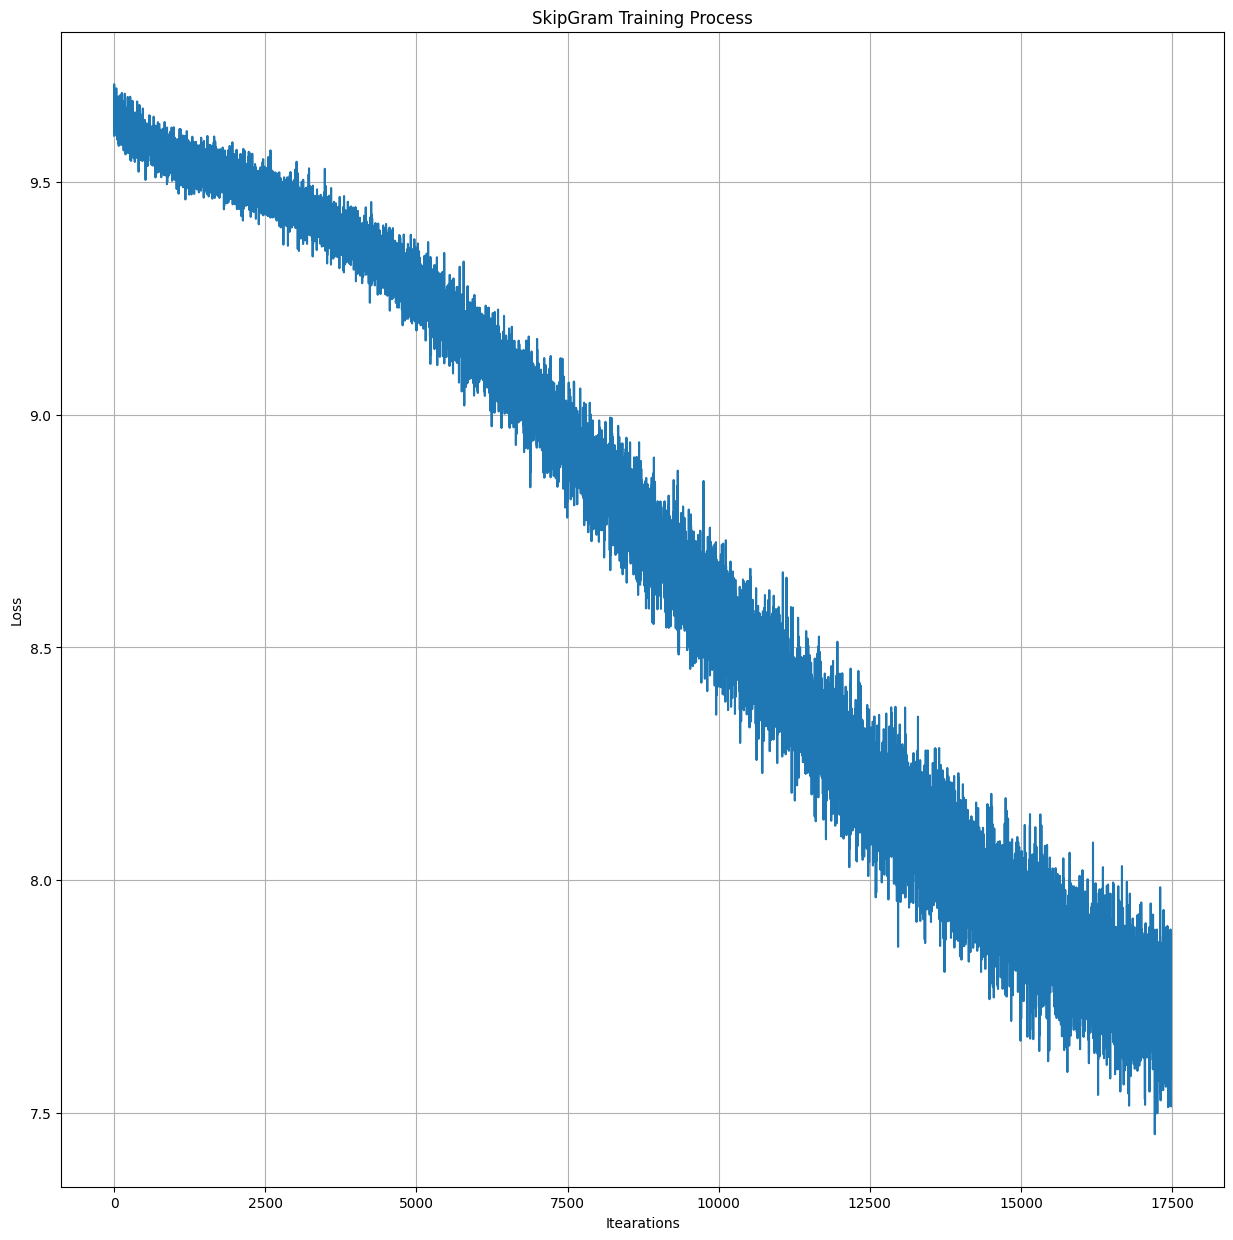

In [ ]:
plt.title('SkipGram Training Process')
plt.xlabel('Itearations')
plt.ylabel('Loss')
plt.grid()
plt.plot(losses)

In [ ]:
embedding_matrix = model.in_embedding.weight.detach()

In [ ]:
def cos_sim(embedding_matrix, token2id, word1, word2):

    i1 = token2id[word1]
    i2 = token2id[word2]

    v1, v2 = embedding_matrix[i1], embedding_matrix[i2]

    v1_n = v1.div(v1.norm(keepdim=True))
    v2_n = v2.div(v2.norm(keepdim=True))

    similarity = torch.dot(v1_n, v2_n).item()

    return similarity

# –ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –±–ª–∏–∑–æ—Å—Ç—å
–û—Ç 0 –¥–æ 1, –≥–¥–µ 0 - –≤–µ–∫—Ç–æ—Ä–∞ –∞–±—Å–æ–ª—é—Ç–Ω–æ —Ä–∞–∑–Ω—ã–µ, –≥–¥–µ 1 - –∏–¥–µ–Ω—Ç–∏—á–Ω—ã–µ.

In [ ]:
cos_sim(embedding_matrix, word2index, '–¥–µ–Ω—å', '–º–µ—Å—è—Ü')

0.33957260847091675

In [ ]:
cos_sim(embedding_matrix, word2index, '–º–∏–Ω—É—Ç–∞', '–º–µ—Å—è—Ü')

0.23171405494213104

In [ ]:
cos_sim(embedding_matrix, word2index, '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '—Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞')

0.5587626099586487

In [ ]:
cos_sim(embedding_matrix, word2index, '–≤–∫–ª–∞–¥', '–ø–µ—Ä–µ–≤–æ–¥')

0.30281147360801697

In [ ]:
random_word = random.choice(list(word2index.keys()))
sim = cos_sim(embedding_matrix, word2index, '–¥–µ–Ω—å', random_word)
'–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –±–ª–∏–∑–æ—Å—Ç—å —Å–ª–æ–≤–∞ "–¥–µ–Ω—å" –∫ —Å–ª—É—á–∞–π–Ω–æ–º—É –≤—ã–±—Ä–∞–Ω–æ–º—É —Å–ª–æ–≤—É "{}" —Ä–∞–≤–Ω–∞ {:.3f}'.format(random_word, sim)

'–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –±–ª–∏–∑–æ—Å—Ç—å —Å–ª–æ–≤–∞ "–¥–µ–Ω—å" –∫ —Å–ª—É—á–∞–π–Ω–æ–º—É –≤—ã–±—Ä–∞–Ω–æ–º—É —Å–ª–æ–≤—É "—á—É–¥–æ" —Ä–∞–≤–Ω–∞ 0.173'

In [ ]:
freq = {}

for text in corpus:
    for token in text:
        if token in freq:
            freq[token] += 1
        else:
            freq[token] = 1

In [ ]:
sorted_freq = [(k, freq[k]) for k in sorted(freq, key=freq.get, reverse=True)]
top_sorted_freq = sorted_freq[0:200]

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=42, verbose=2)
reduced = tsne.fit_transform(embedding_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13076 samples in 0.001s...
[t-SNE] Computed neighbors for 13076 samples in 1.464s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13076
[t-SNE] Computed conditional probabilities for sample 2000 / 13076
[t-SNE] Computed conditional probabilities for sample 3000 / 13076
[t-SNE] Computed conditional probabilities for sample 4000 / 13076
[t-SNE] Computed conditional probabilities for sample 5000 / 13076
[t-SNE] Computed conditional probabilities for sample 6000 / 13076
[t-SNE] Computed conditional probabilities for sample 7000 / 13076
[t-SNE] Computed conditional probabilities for sample 8000 / 13076
[t-SNE] Computed conditional probabilities for sample 9000 / 13076
[t-SNE] Computed conditional probabilities for sample 10000 / 13076
[t-SNE] Computed conditional probabilities for sample 11000 / 13076
[t-SNE] Computed conditional probabilities for sample 12000 / 13076
[t-SNE] Computed conditional probabilities for sam

In [ ]:
top_words = [a for a,_ in top_sorted_freq]

In [ ]:
inds = [word2index[word] for word in top_words]
x_coords = [coords[0] for coords in reduced[inds]]
y_coords = [coords[1] for coords in reduced[inds]]

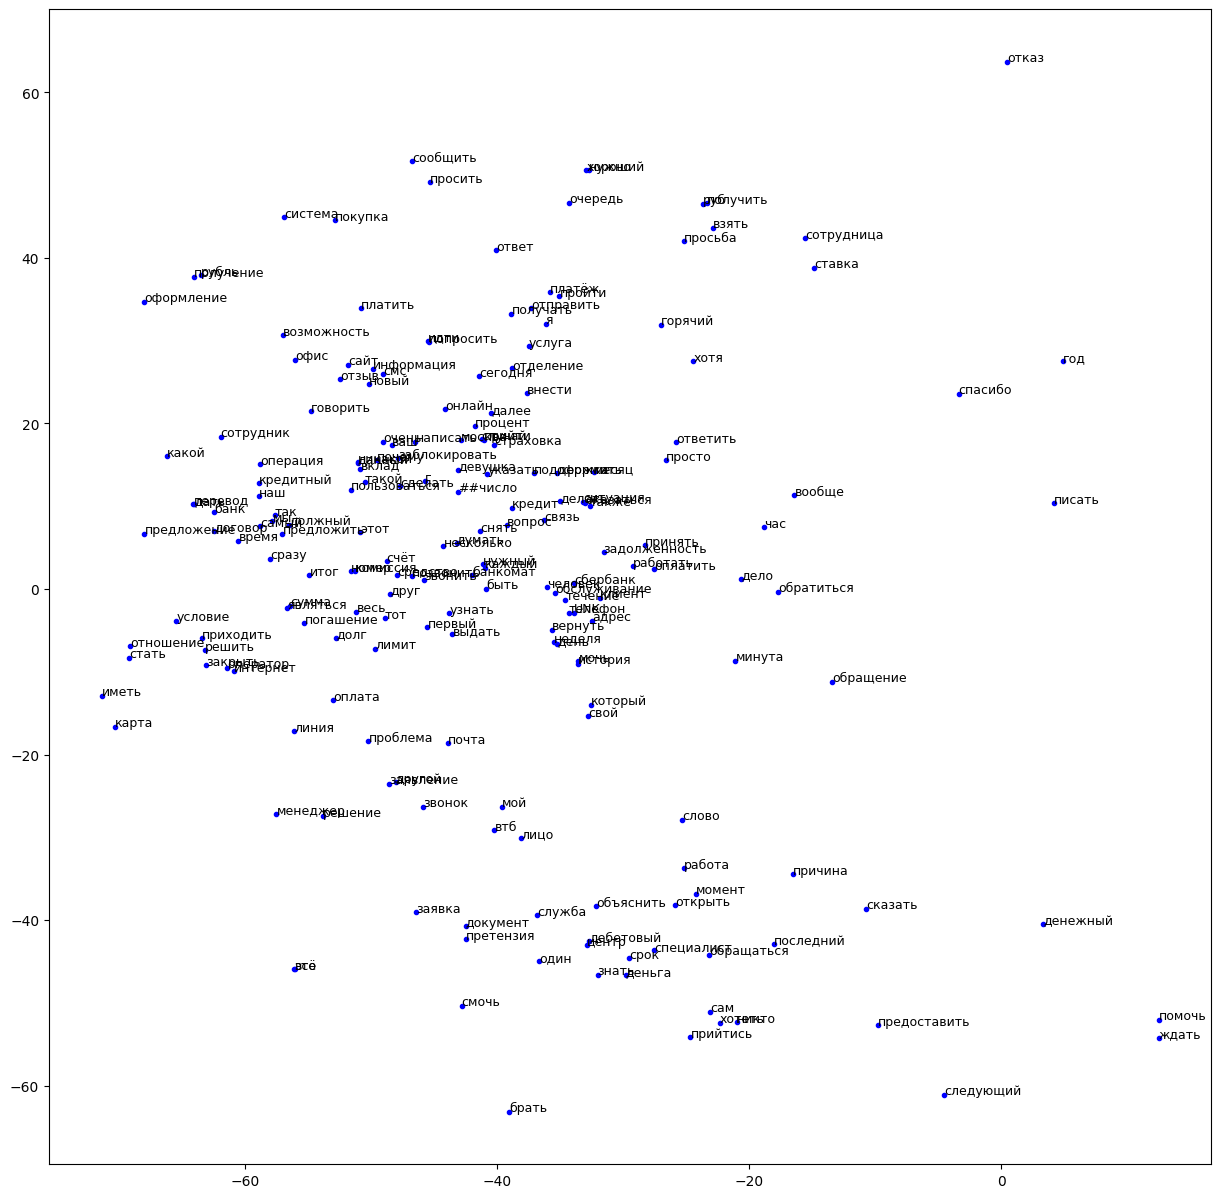

In [ ]:
for (x, y, word) in zip(x_coords, y_coords, top_words):
    plt.scatter(x, y, marker='.', color='blue')
    plt.text(x+0.01, y+0.01, word, fontsize=9)
plt.show()

# –û—Ü–µ–Ω–∫–∞
1. –í—ã –¥–æ–±—Ä–∞–ª–∏—Å—å —Å—é–¥–∞ –∏ –≤—Å–µ —Ä–∞–±–æ—Ç–∞–µ—Ç, –∑–Ω–∞—á–∏—Ç —É–∂–µ –ø–æ–ª—É—á–∏–ª–∏ 7 –±–∞–ª–ª–æ–≤.
2. 8 –±–∞–ª–ª–æ–≤ - –í–∑—è–ª–∏ –∫–æ—Ä–ø—É—Å –¥–ª—è –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ [–∑–¥–µ—Å—å](https://rusvectores.org/static/testsets/ru_simlex965_tagged.tsv). –û–ø–∏—Å–∞–Ω–∏–µ –∫ –Ω–µ–º—É [–∑–¥–µ—Å—å](https://arxiv.org/pdf/1801.06407.pdf). –ï–≥–æ –∞–Ω–≥–ª–∏–π—Å–∫–∞—è –≤–µ—Ä—Å–∏—è –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è, —Ç–æ–≥–æ —á—Ç–æ –∂–µ —ç—Ç–æ —Ç–∞–∫–æ–µ [—Ç—É—Ç](https://fh295.github.io/simlex.html). –ï—Å–ª–∏ –≤ –∫—Ä–∞—Ç—Ü–µ - –æ–Ω –ø–æ—Ö–æ–∂ –∞ –≥—É–≥–ª –∞–Ω–∞–ª–æ–≥–∏–∏, –ø—Ä–æ—Å—Ç–æ –∏–Ω–∞—á–µ —Å–æ—Å—Ç–∞–≤–ª–µ–Ω. –û–ø—Ä–µ–¥–µ–ª–∏–ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ —Å–≤–æ–∏—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤. –ö–∞–∫ –∫–∞—á–µ—Å—Ç–≤–æ –∏–∑–º–µ—Ä–∏—Ç—å? –ú–æ–∂–µ—Ç–µ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å (–ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ 1) –∏ –∑–∞—Ç–µ–º —Å—á–∏—Ç–∞—Ç—å MSE –º–µ–∂–¥—É —Ç–µ–º —á—Ç–æ —É –≤–∞—Å –∏ —á—Ç–æ –≤ –æ—Ä–∏–≥–∏–Ω–∞–ª–µ.
3. 9 –±–∞–ª–ª–æ–≤ - –ü–æ—Å—Ç–∞–≤–∏–ª–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã, –ø–æ–º–µ–Ω—è–ª–∏ –ª—é–±—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ö–æ—Ç—å –∫–æ—Ä–ø—É—Å —É–≤–µ–ª–∏—á–∏–ª–∏ –∏–ª–∏ –∫–∞–∫ —Ç–æ –ø–æ—á–∏—Å—Ç–∏–ª–∏. –ü–æ–∫–∞–∑–∞–ª–∏ –º–µ—Ç—Ä–∏–∫–∏ –¥–æ –∏ –ø–æ—Å–ª–µ. –ü–æ—Å–ª–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –ª—É—á—à–µ, –∏–Ω–∞—á–µ —ç—Ç–æ –≤—Å–µ –µ—â–µ 8 –±–∞–ª–ª–æ–≤.
4. 10 –±–∞–ª–ª–æ–≤ - —É–¥–∏–≤–∏–ª–∏ —Å–≤–æ–∏–º –ø–æ–¥—Ö–æ–¥–æ–º (–∏–ª–∏ –ø—Ä–æ—Å—Ç–æ —É–¥–∏–≤–∏–ª–∏) –ø–æ–∫–∞ –¥–µ–ª–∏–ª–∏ –Ω–∞ 9 –±–∞–ª–ª–æ–≤

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("ru_simlex965_tagged.tsv", sep='\t')

In [ ]:
df

# Word1            Word2  Average Score
0        –∞–≤–∞—Ä–∏—è_NOUN    –±–µ–¥—Å—Ç–≤–∏–µ_NOUN           6.15
1        –∞–≤–≥—É—Å—Ç_NOUN       –º–µ—Å—è—Ü_NOUN           2.85
2       –∞–≤–∏–∞—Ü–∏—è_NOUN       –ø–æ–ª–µ—Ç_NOUN           6.77
3    –∞–≤—Ç–æ–º–æ–±–∏–ª—å_NOUN       –≥—É–¥–æ–∫_NOUN           1.85
4    –∞–≤—Ç–æ–º–æ–±–∏–ª—å_NOUN  –∞–≤—Ç–æ—Å—Ç—Ä–∞–¥–∞_NOUN           1.23
..               ...              ...            ...
960      —è–±–ª–æ–∫–æ_NOUN      —Å–æ–ª–Ω—Ü–µ_NOUN           0.15
961        —è–¥—Ä–æ_NOUN       –ø—É—à–∫–∞_NOUN           2.77
962        —è–∑—ã–∫_NOUN       –≥–æ—Ä–ª–æ_NOUN           1.38
963         —è—Ä–¥_NOUN        –¥—é–π–º_NOUN           2.62
964     —è—Ä–æ—Å—Ç–Ω—ã–π_ADJ         –∑–ª–æ–π_ADJ           7.46

[965 rows x 3 columns]

–ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å –Ω–∞—à–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏, –Ω—É–∂–Ω–æ —É–±—Ä–∞—Ç—å pos-—Ç—ç–≥–∏ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å average score (–º–Ω–µ –±—ã–ª–æ –ª–µ–Ω—å –¥–µ–ª–∞—Ç—å —ç—Ç–æ –≤—Ä—É—á–Ω—É—é, –ø–æ—ç—Ç–æ–º—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞ sklearn)

In [ ]:
def remove_pos(text): #–º–∞–ª–µ–Ω—å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —ç—Ç–æ–≥–æ
  return text.split('_')[0]

In [ ]:
df['# Word1'] = df['# Word1'].apply(remove_pos)
df['Word2'] = df['Word2'].apply(remove_pos)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [ ]:
df['Average Score'] = scaler.fit_transform(df[['Average Score']])

In [ ]:
df

# Word1       Word2  Average Score
0        –∞–≤–∞—Ä–∏—è    –±–µ–¥—Å—Ç–≤–∏–µ          0.230
1        –∞–≤–≥—É—Å—Ç       –º–µ—Å—è—Ü         -0.430
2       –∞–≤–∏–∞—Ü–∏—è       –ø–æ–ª–µ—Ç          0.354
3    –∞–≤—Ç–æ–º–æ–±–∏–ª—å       –≥—É–¥–æ–∫         -0.630
4    –∞–≤—Ç–æ–º–æ–±–∏–ª—å  –∞–≤—Ç–æ—Å—Ç—Ä–∞–¥–∞         -0.754
..          ...         ...            ...
960      —è–±–ª–æ–∫–æ      —Å–æ–ª–Ω—Ü–µ         -0.970
961        —è–¥—Ä–æ       –ø—É—à–∫–∞         -0.446
962        —è–∑—ã–∫       –≥–æ—Ä–ª–æ         -0.724
963         —è—Ä–¥        –¥—é–π–º         -0.476
964    —è—Ä–æ—Å—Ç–Ω—ã–π        –∑–ª–æ–π          0.492

[965 rows x 3 columns]

In [ ]:
df['w2v'] = np.nan

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
exceptions = []

In [ ]:
for index, row in df.iterrows():
  try: # –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –≤ word2index
    df.loc[index, 'w2v'] = cos_sim(embedding_matrix, word2index, row['# Word1'], row['Word2'])
  except:
    exceptions.append((row['# Word1'], row['Word2']))


In [ ]:
df.dropna(inplace = True)

In [ ]:
df

# Word1      Word2  Average Score       w2v
1        –∞–≤–≥—É—Å—Ç      –º–µ—Å—è—Ü         -0.430  0.338263
3    –∞–≤—Ç–æ–º–æ–±–∏–ª—å      –≥—É–¥–æ–∫         -0.630 -0.430595
5    –∞–≤—Ç–æ–º–æ–±–∏–ª—å      —Ç–∞–∫—Å–∏         -0.170 -0.342573
7    –∞–≤—Ç–æ–º–æ–±–∏–ª—å  –≤–µ–ª–æ—Å–∏–ø–µ–¥         -0.724 -0.322585
9    –∞–≤—Ç–æ–º–æ–±–∏–ª—å       –º–æ—Å—Ç         -0.770  0.174027
..          ...        ...            ...       ...
952      —é–±–∏–ª–µ–π        –≥–æ–¥         -0.462 -0.173111
953      —é–±–∏–ª–µ–π       –¥–∞—Ç–∞          0.324 -0.047370
954          —é–≥      —Å–µ–≤–µ—Ä         -1.000  0.078127
955       —é—Ä–∏—Å—Ç     –±–∞–Ω–∫–∏—Ä         -0.770  0.269221
962        —è–∑—ã–∫      –≥–æ—Ä–ª–æ         -0.724  0.033728

[498 rows x 4 columns]

In [ ]:
mse = mean_squared_error(df['Average Score'], df['w2v'])

In [ ]:
print(f'MSE: {mse}')

MSE: 0.5317176232227097


# –£–ª—É—á—à–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

–ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å
* —É–≤–µ–ª–∏—á–∏—Ç—å —Ä–∞–∑–º–µ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ (–±–æ–ª—å—à–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ = –±–æ–ª—å—à–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏)
* –∏–∑–º–µ–Ω–∏—Ç—å learning rate
* —É–≤–µ–ª–∏—á–∏—Ç—å –æ–±—ä–µ–º –∫–æ—Ä–ø—É—Å–∞
* –∏–∑–º–µ–Ω–∏—Ç—å —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞ –¥–ª—è skipgram
* –∏–∑–º–µ–Ω–∏—Ç—å —á–∏—Å–ª–æ —ç–ø–æ—Ö –∏–ª–∏ —Ä–∞–∑–º–µ—Ä –±–∞—á–∞

In [ ]:
def pipeline(window = 2, embedding_dim=EMBEDDING_DIM, batch_size=BATCH_SIZE, lr = 0.0001, epochs = 3):
  dataset = SkipgramDataset(corpus, word2index, window=window)
  dataset_loader = DataLoader(dataset, shuffle=True, batch_size=BATCH_SIZE)
  model = SkipGram(vocab_size=len(word2index), embedding_dim=EMBEDDING_DIM)
  optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
  criterion = torch.nn.CrossEntropyLoss()
  losses = []
  for n_epoch in range(epochs):

    try:

        progress_bar = tqdm(total=len(dataset_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

        for x, y in dataset_loader:

            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            progress_bar.set_postfix(loss=np.mean(losses[-100:]))

            progress_bar.update(x.shape[0])

        progress_bar.close()
    except KeyboardInterrupt:

        progress_bar.close()
        break
  plt.title('SkipGram Training Process')
  plt.xlabel('Itearations')
  plt.ylabel('Loss')
  plt.grid()
  plt.plot(losses)
  matrix = model.in_embedding.weight.detach()
  return matrix

In [ ]:
tests = []

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 1: —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞ 3

Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4174732/4174732 [10:19<00:00, 6740.38it/s, loss=7.41]


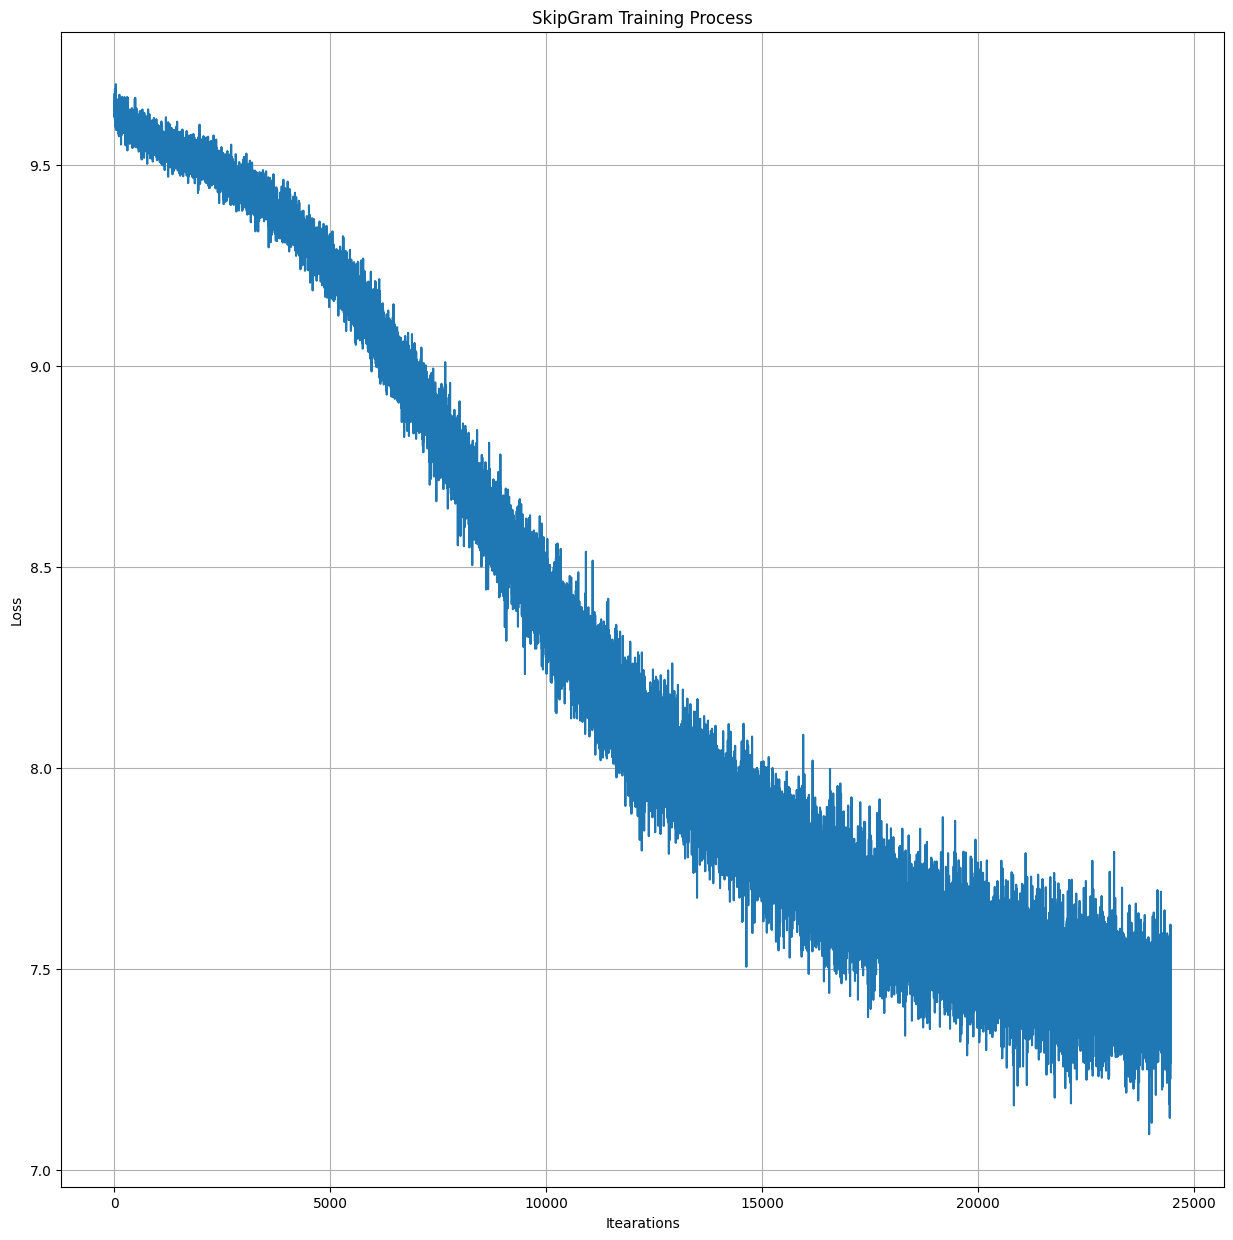

In [ ]:
tests.append(pipeline(window=3))

In [ ]:
df['w2v_2'] = np.nan

In [ ]:
exceptions = []

In [ ]:
for index, row in df.iterrows():
  try: # –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –≤ word2index
    df.loc[index, 'w2v_2'] = cos_sim(tests[0], word2index, row['# Word1'], row['Word2'])
  except:
    exceptions.append((row['# Word1'], row['Word2']))


In [ ]:
df

# Word1      Word2  Average Score       w2v     w2v_2
1        –∞–≤–≥—É—Å—Ç      –º–µ—Å—è—Ü         -0.430  0.338263  0.479749
3    –∞–≤—Ç–æ–º–æ–±–∏–ª—å      –≥—É–¥–æ–∫         -0.630 -0.430595  0.206651
5    –∞–≤—Ç–æ–º–æ–±–∏–ª—å      —Ç–∞–∫—Å–∏         -0.170 -0.342573  0.276707
7    –∞–≤—Ç–æ–º–æ–±–∏–ª—å  –≤–µ–ª–æ—Å–∏–ø–µ–¥         -0.724 -0.322585 -0.411742
9    –∞–≤—Ç–æ–º–æ–±–∏–ª—å       –º–æ—Å—Ç         -0.770  0.174027  0.065769
..          ...        ...            ...       ...       ...
952      —é–±–∏–ª–µ–π        –≥–æ–¥         -0.462 -0.173111  0.045532
953      —é–±–∏–ª–µ–π       –¥–∞—Ç–∞          0.324 -0.047370 -0.164682
954          —é–≥      —Å–µ–≤–µ—Ä         -1.000  0.078127  0.075659
955       —é—Ä–∏—Å—Ç     –±–∞–Ω–∫–∏—Ä         -0.770  0.269221 -0.013452
962        —è–∑—ã–∫      –≥–æ—Ä–ª–æ         -0.724  0.033728 -0.366576

[498 rows x 5 columns]

In [ ]:
mse2 = mean_squared_error(df['Average Score'], df['w2v_2'])

In [ ]:
mse2

0.5494152567055075

–ü–æ—Å–ª–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞ –æ–∫–Ω–∞ —Å—Ç–∞–ª–æ —Ö—É–∂–µ üòß

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2: —Ä–∞–∑–º–µ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ 50

Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2983124/2983124 [07:11<00:00, 6916.41it/s, loss=7.64]


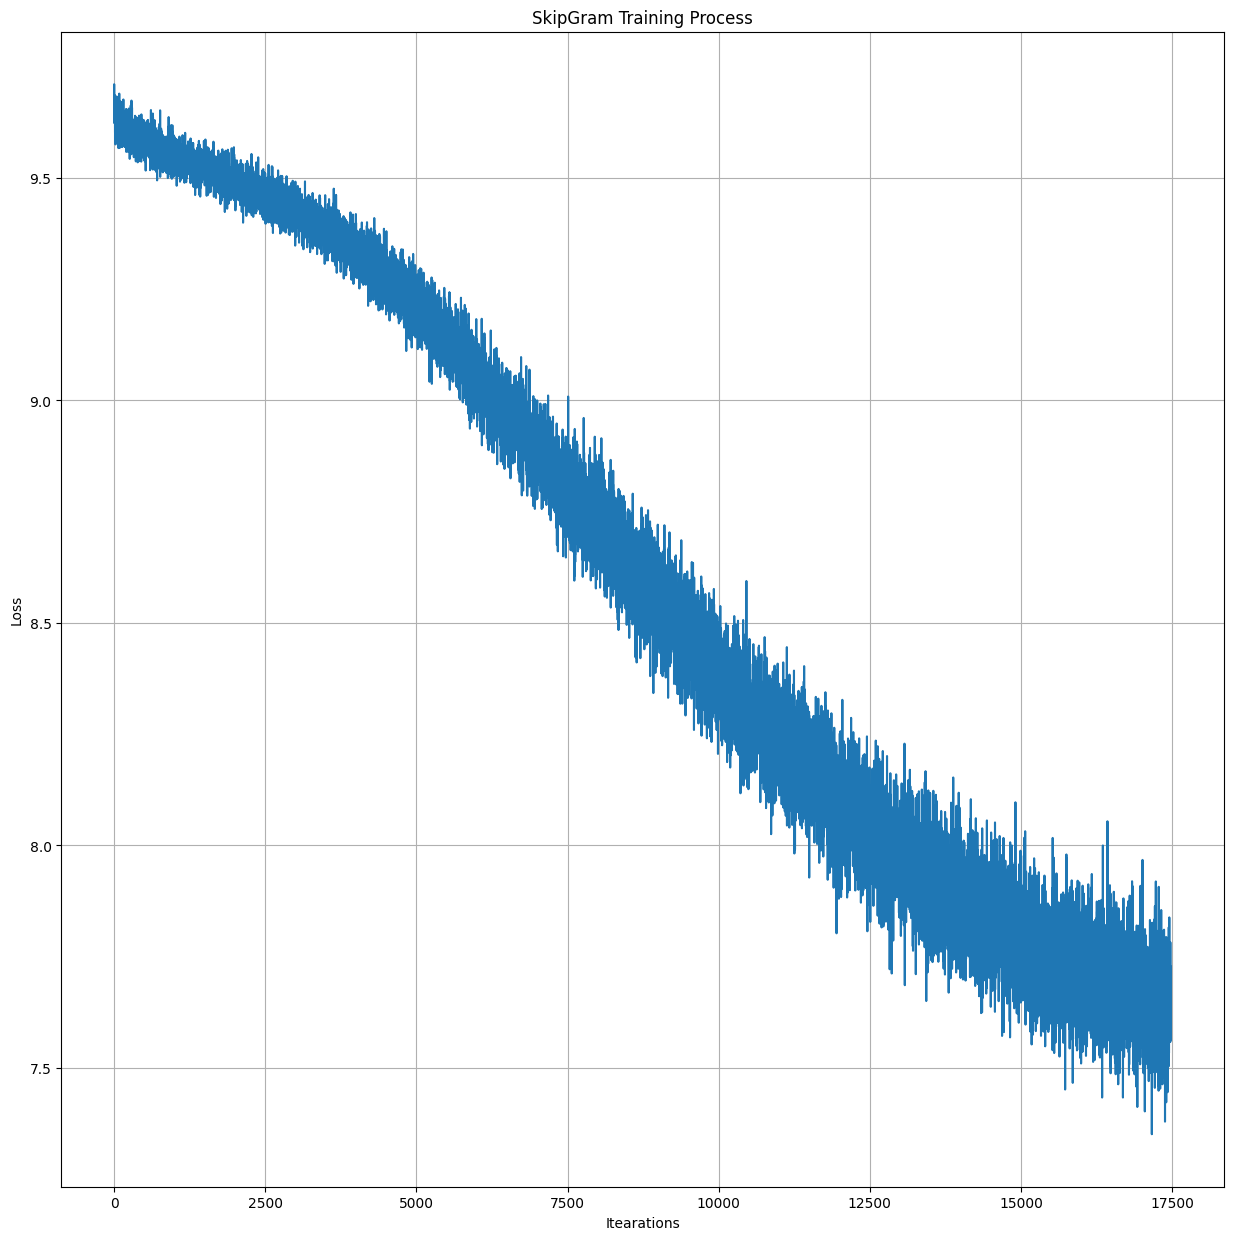

In [ ]:
tests.append(pipeline(embedding_dim=50))

In [ ]:
df['w2v_3'] = np.nan

In [ ]:
exceptions = []

In [ ]:
for index, row in df.iterrows():
  try: # –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –≤ word2index
    df.loc[index, 'w2v_3'] = cos_sim(tests[1], word2index, row['# Word1'], row['Word2'])
  except:
    exceptions.append((row['# Word1'], row['Word2']))


In [ ]:
df

# Word1      Word2  Average Score       w2v     w2v_2     w2v_3
1        –∞–≤–≥—É—Å—Ç      –º–µ—Å—è—Ü         -0.430  0.338263  0.479749  0.098904
3    –∞–≤—Ç–æ–º–æ–±–∏–ª—å      –≥—É–¥–æ–∫         -0.630 -0.430595  0.206651 -0.126957
5    –∞–≤—Ç–æ–º–æ–±–∏–ª—å      —Ç–∞–∫—Å–∏         -0.170 -0.342573  0.276707  0.035146
7    –∞–≤—Ç–æ–º–æ–±–∏–ª—å  –≤–µ–ª–æ—Å–∏–ø–µ–¥         -0.724 -0.322585 -0.411742 -0.062977
9    –∞–≤—Ç–æ–º–æ–±–∏–ª—å       –º–æ—Å—Ç         -0.770  0.174027  0.065769 -0.066096
..          ...        ...            ...       ...       ...       ...
952      —é–±–∏–ª–µ–π        –≥–æ–¥         -0.462 -0.173111  0.045532 -0.089295
953      —é–±–∏–ª–µ–π       –¥–∞—Ç–∞          0.324 -0.047370 -0.164682  0.118985
954          —é–≥      —Å–µ–≤–µ—Ä         -1.000  0.078127  0.075659  0.222210
955       —é—Ä–∏—Å—Ç     –±–∞–Ω–∫–∏—Ä         -0.770  0.269221 -0.013452  0.254573
962        —è–∑—ã–∫      –≥–æ—Ä–ª–æ         -0.724  0.033728 -0.366576 -0.061352

[498 rows x 6 columns]

In [ ]:
mse3 = mean_squared_error(df['Average Score'], df['w2v_3'])

In [ ]:
mse3

0.5057723611407534

–º–µ—Ç—Ä–∏–∫–∞ –¥–æ:

In [ ]:
mse

0.5317176232227097

–°—Ç–∞–ª–æ –ª—É—á—à–µ –Ω–∞ 0.03